In [37]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

In [7]:
edges = pd.read_csv('Random Dataset/Random Dataset/edges.csv')
nodes = pd.read_csv('Random Dataset/Random Dataset/nodes.csv')

In [8]:
edges.head()

,Unnamed: 0,User_1,User_2
0,0,6,44
1,1,49,6
2,2,15,4
3,3,61,67
4,4,31,17


In [9]:
nodes.head()

,Unnamed: 0,User_ID,User,Country
0,0,1,Mark Hernandez,United States of America
1,1,2,Oliver Jones,United States of America
2,2,3,Niam Taylor,United States of America
3,3,4,Oliver Lopez,United States of America
4,4,5,Mary Miller,United States of America


In [10]:
del edges[edges.columns[0]]
del nodes[nodes.columns[0]]

In [12]:
edges.head()

,User_1,User_2
0,6,44
1,49,6
2,15,4
3,61,67
4,31,17


In [13]:
nodes.head()

,User_ID,User,Country
0,1,Mark Hernandez,United States of America
1,2,Oliver Jones,United States of America
2,3,Niam Taylor,United States of America
3,4,Oliver Lopez,United States of America
4,5,Mary Miller,United States of America


In [31]:
nodes.Country.unique()

array(['United States of America', 'Armenia', 'Russia'], dtype=object)

In [15]:
edges_array = np.array(edges)
edges_array

array([[  6,  44],
       [ 49,   6],
       [ 15,   4],
       ...,
       [ 53,  41],
       [ 55, 107],
       [ 81,  45]])

In [17]:
G = nx.Graph()
G.add_edges_from(edges_array)

In [27]:
options = {
    "font_size": 10,
    "node_size": 500,
    "node_color": "orange",
    "edgecolors": "black",
    "linewidths": 0.7,
    "width": 0.5,
}

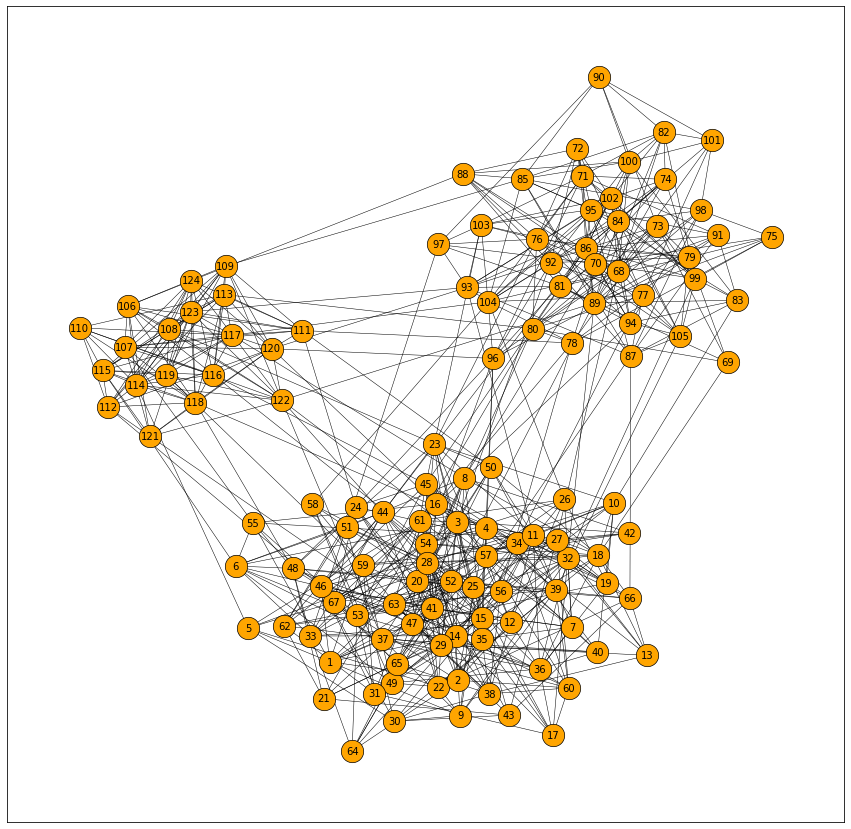

In [28]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(G, **options)
plt.show()

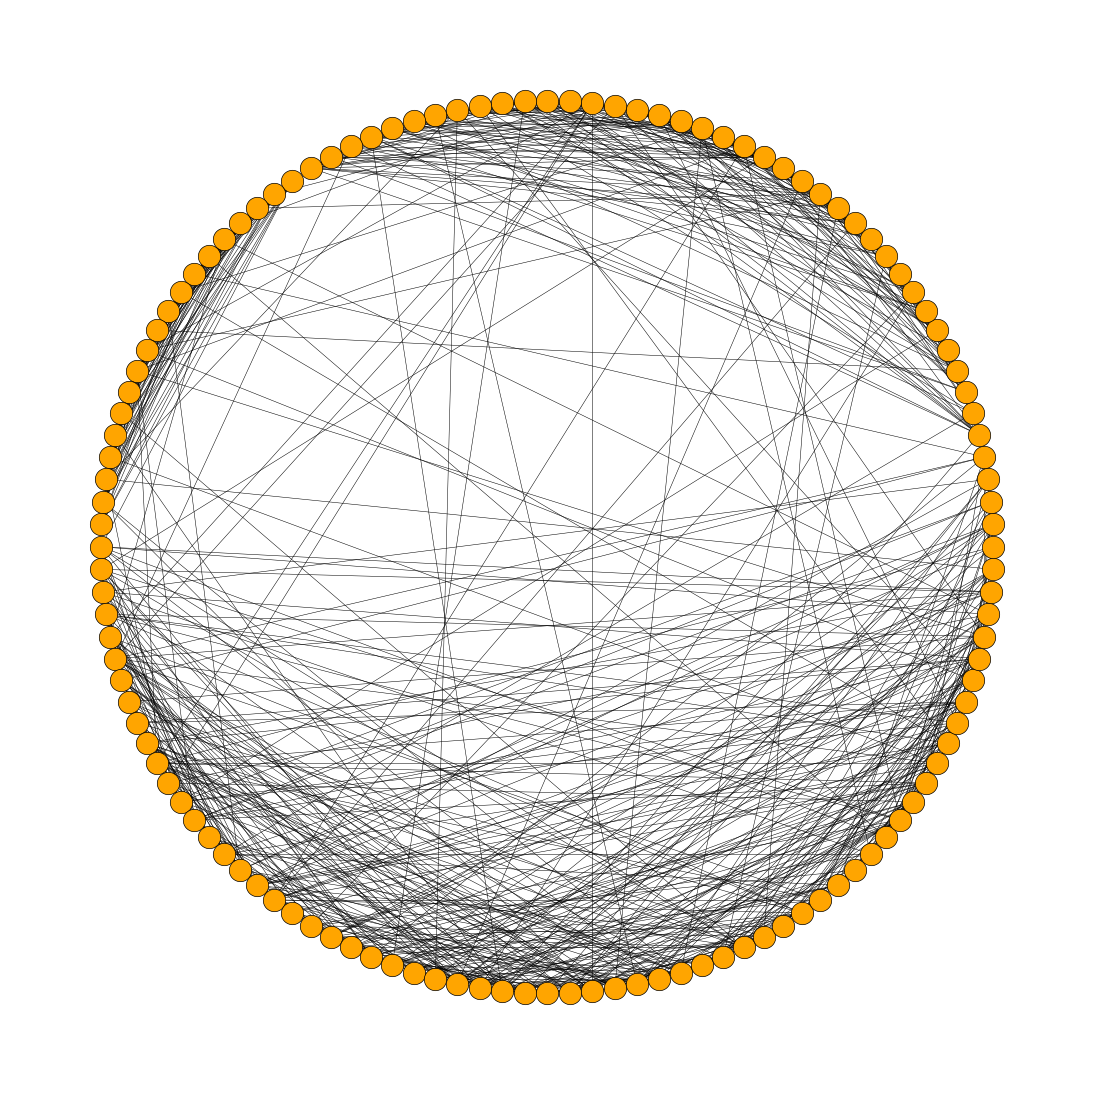

In [29]:
plt.figure(figsize=(15, 15))
nx.draw_shell(G, **options)
plt.show()

## Coloring nodes by countries

In [42]:
# setting User_ID as index in nodes df, and
# reindexing nodes the nodes by the nodes of G
nodes = nodes.set_index('User_ID')
cat = nodes.reindex(G.nodes())

KeyError: "None of ['User_ID'] are in the columns"

In [35]:
# making Country as category
cat['Country'] = pd.Categorical(cat['Country'])
cat['Country'].cat.codes

User_ID
6      2
44     2
49     2
15     2
4      2
      ..
108    1
121    1
111    1
116    1
110    1
Length: 124, dtype: int8

In [38]:
# creating a colormap
cmap = col.ListedColormap(['C0', 'darkorange', 'green'])

#### Green is USA, Darkorange is Russia, and C0 is Armenia

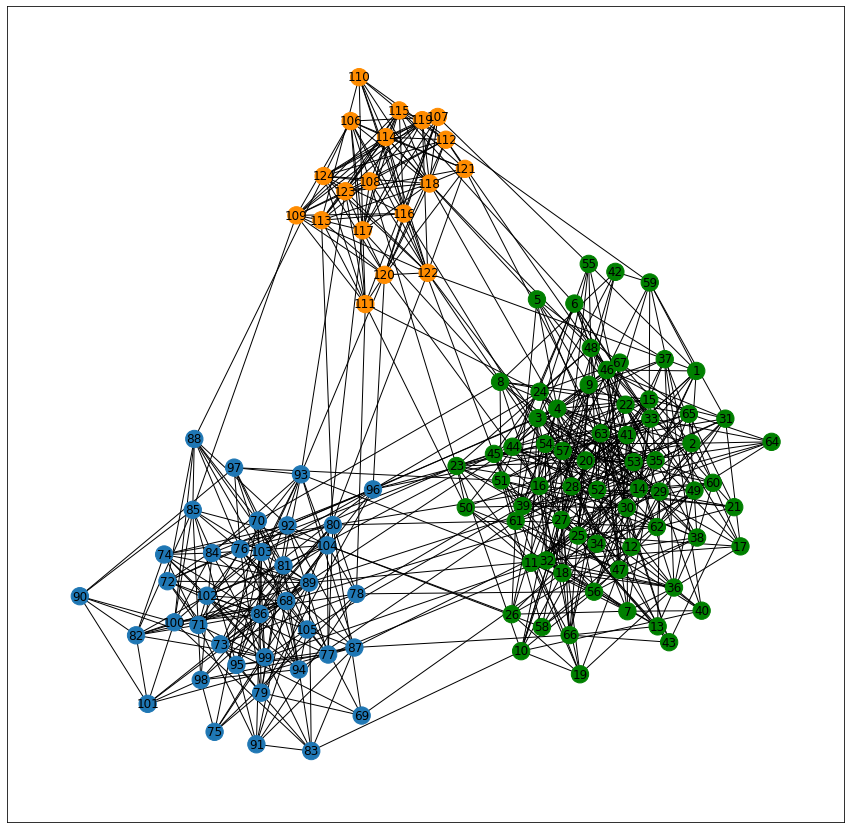

In [40]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(G, with_labels=True, node_color=cat['Country'].cat.codes, cmap=cmap)
plt.show()

### Coloring by degree of each node

In [52]:
node_color = [G.degree(v) for v in G]
options2 = {
    "font_size": 10,
    "node_size": 500,
    "edgecolors": "black",
    "linewidths": 0.7,
    "width": 0.5,
}

In [59]:
node_color[44]

10

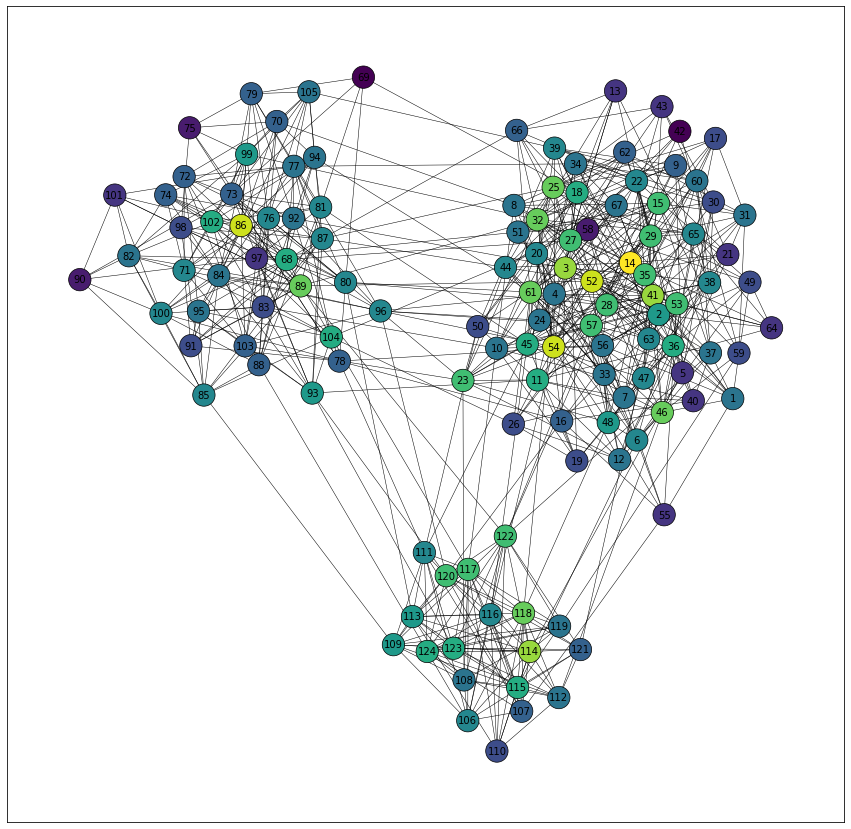

In [54]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(G, with_labels=True, node_color=node_color, **options2)
plt.show()

In [61]:
arm = np.array(nodes.loc[nodes.Country == 'Armenia'].index)

In [63]:
armenians = edges.loc[edges['User_1'].isin(arm)].loc[edges['User_2'].isin(arm)]
armenians.head()

,User_1,User_2
345,76,97
346,82,85
347,101,77
348,95,77
349,87,95


In [64]:
A = nx.Graph()
A.add_edges_from(np.array(armenians))

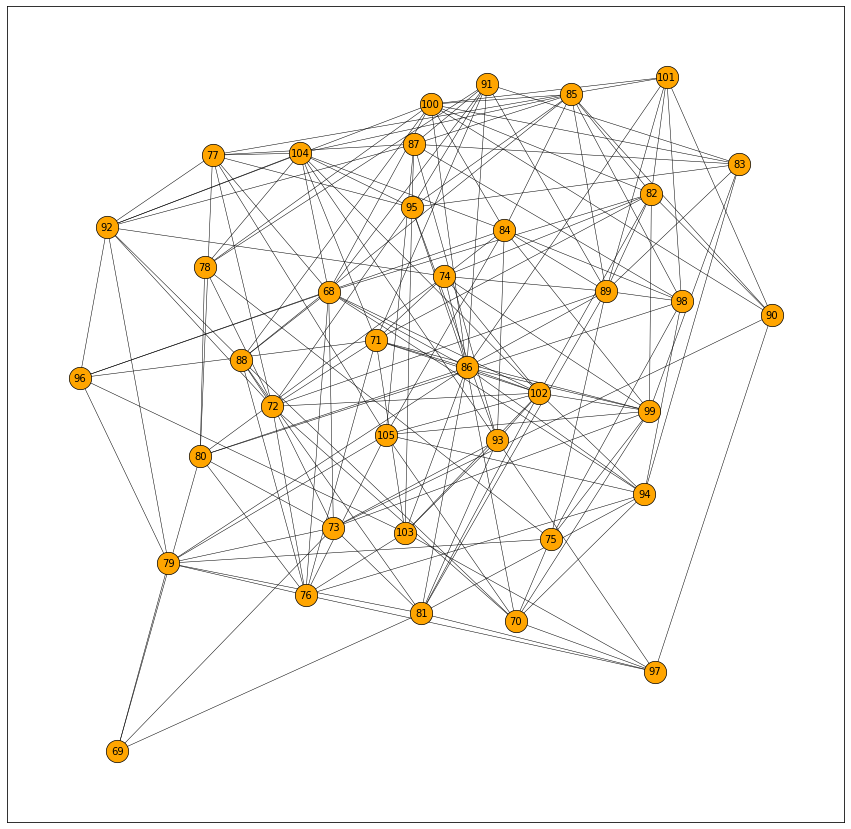

In [65]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(A, **options)
plt.show()

In [67]:
# average local clustering coefficient over all nodes for Armenians
nx.average_clustering(A)

0.24569151608625295

In [68]:
# measuring the transitivity: ratio of number of triangles
# over the number open triads
nx.transitivity(A)

0.24229979466119098

In [69]:
# average distance between every pair of node
nx.average_shortest_path_length(A)

1.8321479374110954

In [70]:
# maximum distance between any pair of node
nx.diameter(A)

3

In [72]:
# eccentricity(largest distance betwen a node from other nodes) of nodes
nx.eccentricity(A)

{76: 3,
 97: 3,
 82: 3,
 85: 3,
 101: 3,
 77: 3,
 95: 3,
 87: 3,
 90: 3,
 83: 3,
 100: 3,
 99: 2,
 81: 3,
 93: 3,
 92: 3,
 79: 3,
 86: 2,
 89: 2,
 75: 3,
 104: 3,
 71: 3,
 68: 3,
 73: 3,
 80: 3,
 96: 3,
 88: 2,
 72: 3,
 105: 3,
 98: 3,
 70: 3,
 78: 3,
 69: 3,
 84: 3,
 91: 3,
 103: 3,
 94: 3,
 74: 3,
 102: 2}

In [73]:
# radius of a graph
nx.radius(A)

2